In [1]:
# The purpose for this simple code is to demonstrate how to make a PCA plot.
# The data we used is from UCI machine learning repository
# https://archive.ics.uci.edu/ml/datasets/wine+quality
# With this data, you can use different wine properties to predict the wine quality.

# we will only do PCA here. 


In [2]:
# we only get our tools here.
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [3]:

# read data. you can change the filename to your file, and create PCA for your own data
data = pd.read_csv("winequality-white.csv", sep=";",header=0, index_col=False)


In [4]:
# let's take a quick look of the first 5 rows of the data
#each wine has a quality and different properties, such as PH, density....
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# I want to look at the relationship between wine quality and all other properties.
# So I use wine quality as my single y-value, 
#for your experimental data Y can be "ctr1",'ctr2'...'exp1','exp2'..... 
wineY=data.iloc[:,-1].values
# I use all the others as X, X1,X2, X3.... which is 11 features 
# for your data, your X might be "gene1/protein1 level","gene2/protein2 level"....
wineX=data.iloc[:,0:-1].values 
print(wineX)

[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]


In [7]:
#  Notice the some data are big, some are very small.
# We transform the data to the same scale. Data was rounded just for demonstrations
wineX=StandardScaler().fit_transform(wineX).round(2)
print(wineX)

[[ 0.17 -0.08  0.21 ... -1.25 -0.35 -1.39]
 [-0.66  0.22  0.05 ...  0.74  0.   -0.82]
 [ 1.48  0.02  0.54 ...  0.48 -0.44 -0.34]
 ...
 [-0.42 -0.38 -1.19 ... -1.31 -0.26 -0.91]
 [-1.61  0.12 -0.28 ...  1.   -0.96  1.86]
 [-1.01 -0.68  0.38 ...  0.48 -1.49  1.04]]


In [9]:
# Now we perform PCA, we start from 11 componet and we will still get 11 PCA component. 
features=wineX.shape[1]  

# the real PCA is only two lines
pca = PCA(n_components=features,random_state=100) # for simplicity, we use all default
X_PCA=pca.fit_transform(wineX)
# we finish PCA

Text(0.5, 1.0, 'Your PCA results ')

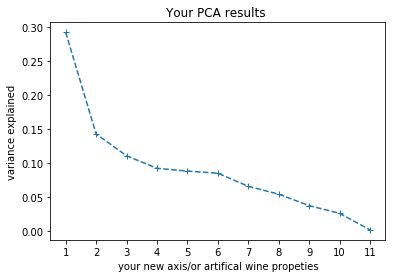

In [11]:
# Now let's plot the variance associated with all PCA components we get 
plt.plot(range(1,features+1),pca.explained_variance_ratio_,'--+')
plt.xticks(range(1,features+1))
plt.xlabel("your new axis/or artifical wine propeties")
plt.ylabel("variance explained") 
plt.title('Your PCA results ' )


In [12]:
# from the plot I will use the first 8 components for any further analysis. 
# but for plotting, we can only plot in 2D or 3D


Text(0.5, 1.0, 'data after PCA')

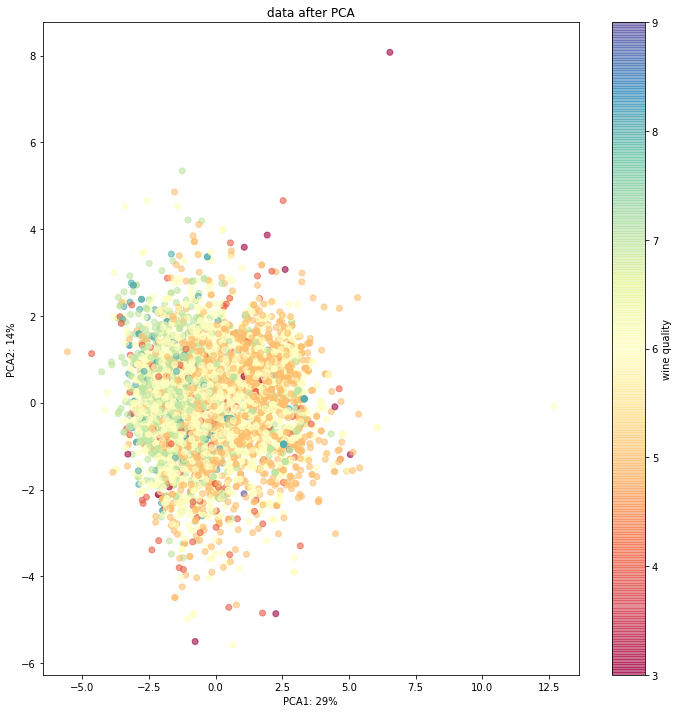

In [13]:
# now use 2 PCA components to plot the original data 
# we use the wine quality to color the data points
fig = plt.figure(figsize=(12, 12))
plt.scatter(X_PCA[:, 0], X_PCA[:, 1],c=wineY,cmap=cm.Spectral, alpha=0.6);
pca1="PCA1: "+"{:.0%}".format(pca.explained_variance_ratio_[0])
pca2="PCA2: "+"{:.0%}".format(pca.explained_variance_ratio_[1])
plt.xlabel(pca1)
plt.ylabel(pca2)
plt.colorbar(label="wine quality")
plt.title("data after PCA")

# In this plot, there is no good seperation of different wines.
